#### This exploratory notebook is used to explore the enriched dataset, and gather insights and observations for training

In [55]:
#Imports
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor


In [56]:
with open('../config.json', 'r') as config_file:
    config = json.load(config_file)

enriched_nhanes = config.get('enriched_processed')
enriched_nhanes = pd.read_csv(enriched_nhanes)
enriched_nhanes.head()

,age_group,ever_asthma,current_asthma,asthma_attack_past_year,asthma_emergency_past_year,any_liver_condition,cancer_malignancy,num_presc_taken,polypharmacy_risk,confidence_indicator,normalized_health_score,normalized_filtered_ade_likelihood,normalized_filtered_avg_drug_risk_score,rebalanced_composite_risk_score,composite_risk_score_log
0,Young Adult,2.0,0.0,0.0,0.0,0.0,2.0,1.0,Low,3064,0.8,0.027983,0.394612,0.487317,0.396974
1,Elderly,2.0,0.0,0.0,0.0,0.0,2.0,2.0,Low,1996,0.8,0.349066,0.192512,0.543222,0.433873
2,Young Adult,1.0,1.0,1.0,1.0,0.0,2.0,3.0,Low,3064,0.6,0.027983,0.394612,0.387317,0.327372
3,Elderly,2.0,0.0,0.0,0.0,0.0,2.0,2.0,Low,1996,0.8,0.349066,0.192512,0.543222,0.433873
4,Elderly,1.0,1.0,1.0,1.0,0.0,1.0,5.0,Moderate,183,0.0,0.708589,0.780384,0.368654,0.313827


In [57]:
#Overview
enriched_nhanes.info()
enriched_nhanes.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   age_group                                276 non-null    object 
 1   ever_asthma                              276 non-null    float64
 2   current_asthma                           276 non-null    float64
 3   asthma_attack_past_year                  276 non-null    float64
 4   asthma_emergency_past_year               276 non-null    float64
 5   any_liver_condition                      276 non-null    float64
 6   cancer_malignancy                        276 non-null    float64
 7   num_presc_taken                          276 non-null    float64
 8   polypharmacy_risk                        276 non-null    object 
 9   confidence_indicator                     276 non-null    int64  
 10  normalized_health_score                  276 non-n

,ever_asthma,current_asthma,asthma_attack_past_year,asthma_emergency_past_year,any_liver_condition,cancer_malignancy,num_presc_taken,confidence_indicator,normalized_health_score,normalized_filtered_ade_likelihood,normalized_filtered_avg_drug_risk_score,rebalanced_composite_risk_score,composite_risk_score_log
count,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000,276.000000
mean,1.829710,0.202899,0.177536,0.228261,0.108696,1.702899,2.500000,2040.713768,0.719565,0.272091,0.325304,0.506471,0.403631
std,0.395412,0.506818,0.533601,0.787677,0.454229,0.659580,1.540956,1028.440953,0.219208,0.238416,0.218015,0.160636,0.113542
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,60.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000,1460.000000,0.800000,0.027983,0.192512,0.487317,0.396974
50%,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1996.000000,0.800000,0.201104,0.256001,0.511531,0.413123
75%,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,4.000000,2844.000000,0.800000,0.349066,0.394612,0.543222,0.433873
max,2.000000,2.000000,2.000000,9.000000,2.000000,2.000000,9.000000,3064.000000,1.000000,1.000000,1.000000,0.878711,0.630586


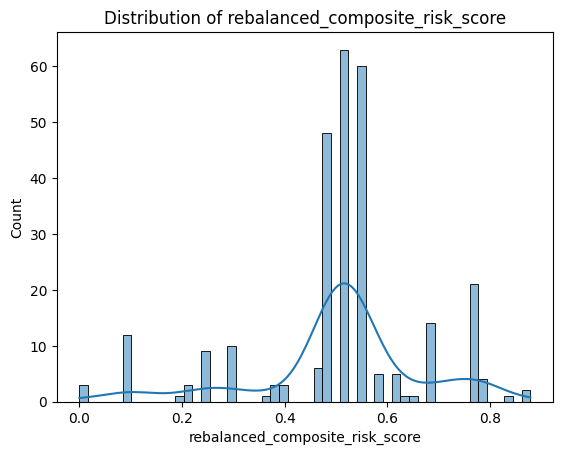

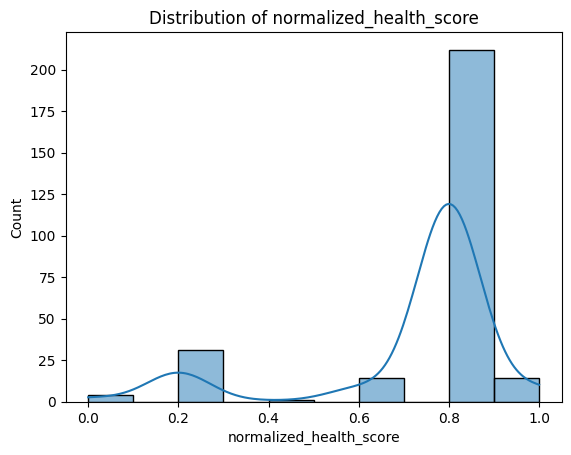

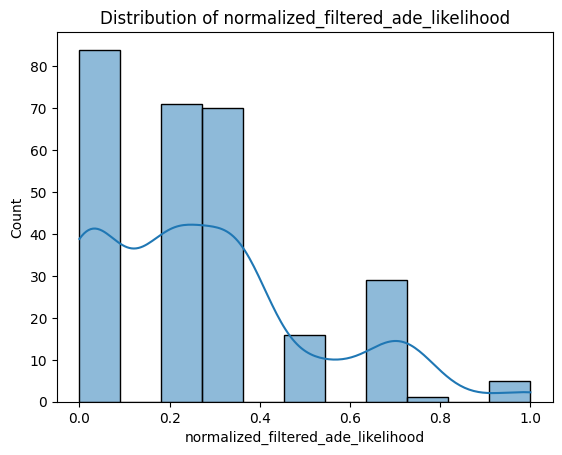

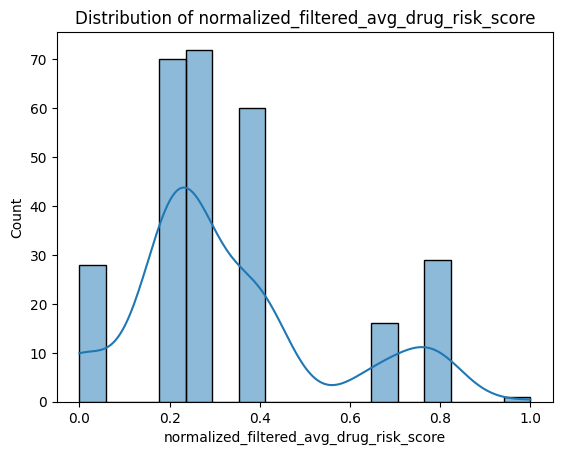

In [58]:
#Distribution Analysis
for column in [
    'rebalanced_composite_risk_score',
    'normalized_health_score',
    'normalized_filtered_ade_likelihood',
    'normalized_filtered_avg_drug_risk_score',
]:
    sns.histplot(enriched_nhanes[column], kde=True)
    plt.title(f"Distribution of {column}")
    plt.show()

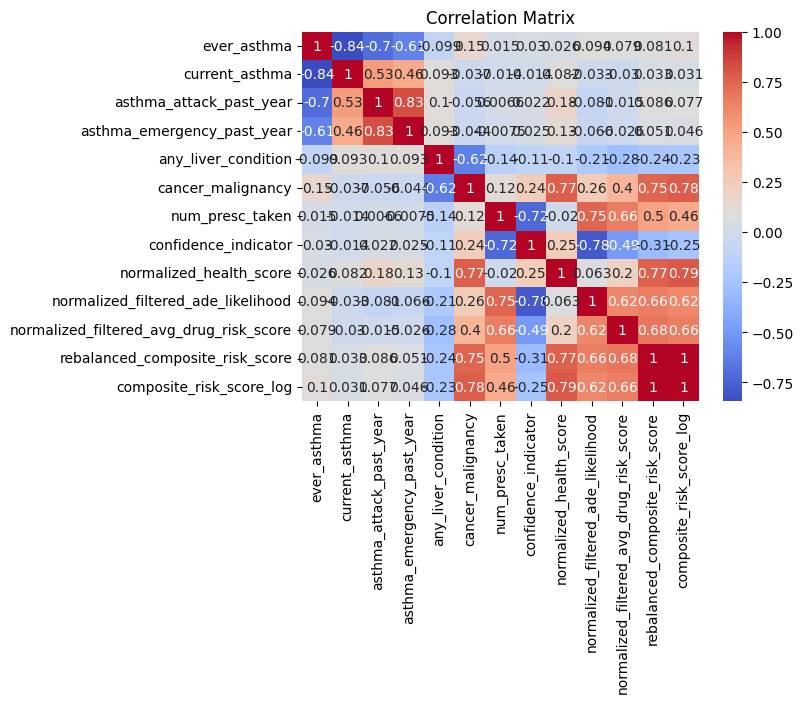

In [59]:
#Correlation Analysis
# Filter numeric columns only
numeric_columns = enriched_nhanes.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


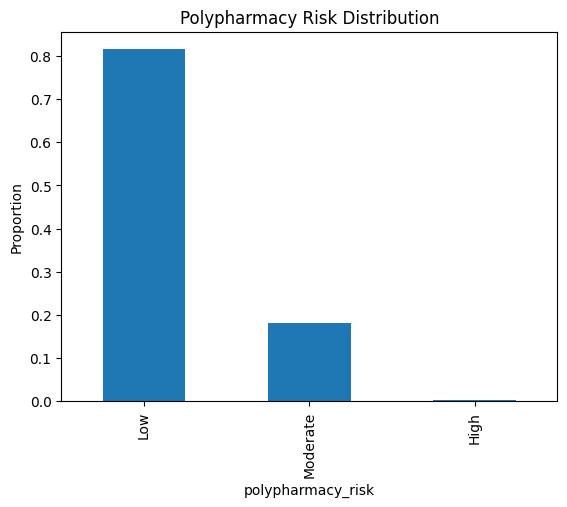

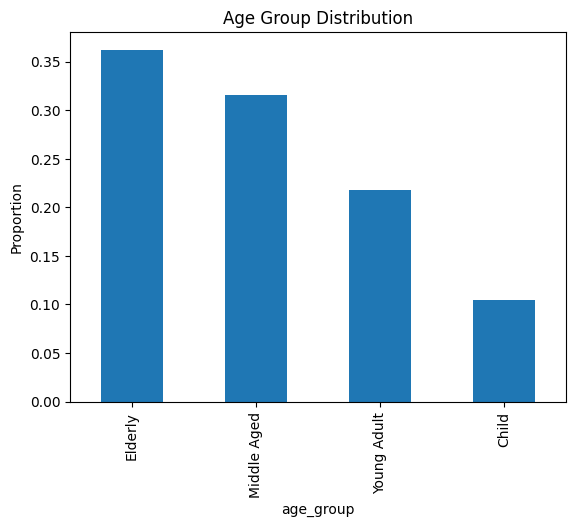

In [60]:
#Class Imbalance
# Polypharmacy Risk Distribution
enriched_nhanes['polypharmacy_risk'].value_counts(normalize=True).plot(kind='bar')
plt.title("Polypharmacy Risk Distribution")
plt.ylabel("Proportion")
plt.show()

# Age Group Distribution
enriched_nhanes['age_group'].value_counts(normalize=True).plot(kind='bar')
plt.title("Age Group Distribution")
plt.ylabel("Proportion")
plt.show()

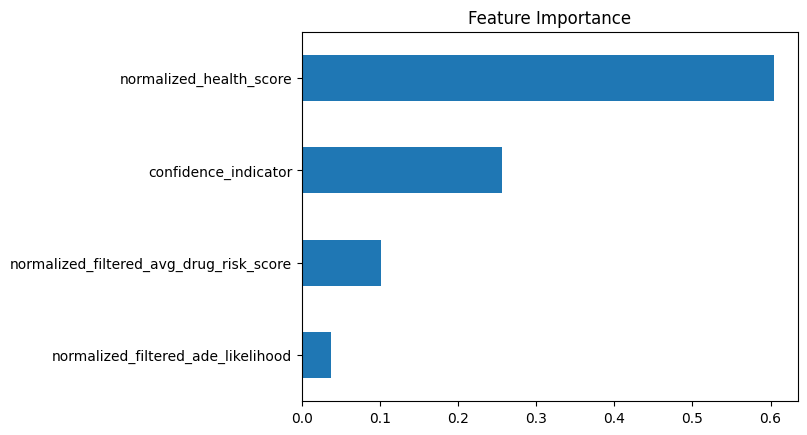

In [61]:
#Feature Importance Assessment
features = [
    'normalized_health_score',
    'normalized_filtered_ade_likelihood',
    'normalized_filtered_avg_drug_risk_score',
    'confidence_indicator',
]
target = 'rebalanced_composite_risk_score'

model = RandomForestRegressor(random_state=42)
model.fit(enriched_nhanes[features], enriched_nhanes[target])

# Plot feature importance
feature_importances = pd.Series(model.feature_importances_, index=features)
feature_importances.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()


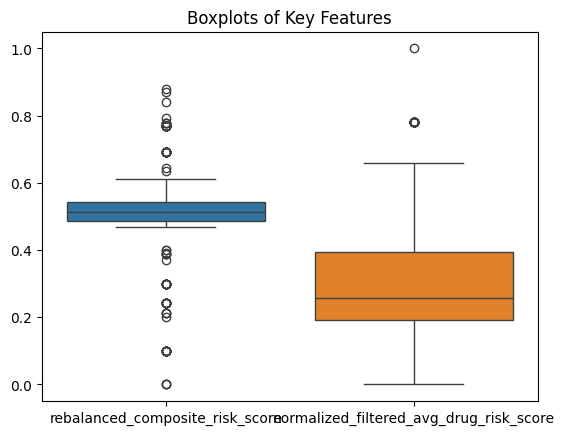

In [62]:
#Outlier Detection
sns.boxplot(
    data=enriched_nhanes[
        ['rebalanced_composite_risk_score', 'normalized_filtered_avg_drug_risk_score']
    ]
)
plt.title("Boxplots of Key Features")
plt.show()

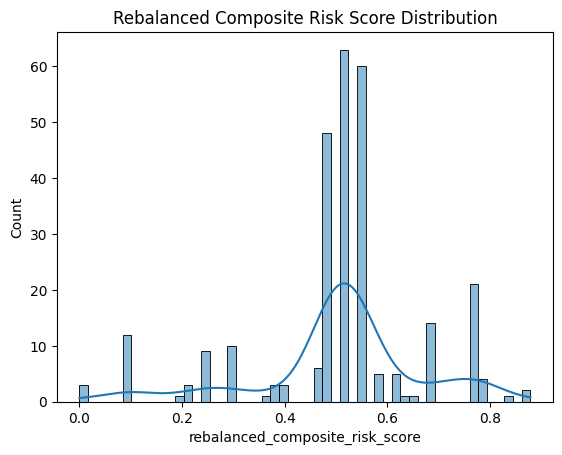

In [63]:
#Target Variable Analysis
#Ensure if appropriate for predictive modeling
sns.histplot(enriched_nhanes['rebalanced_composite_risk_score'], kde=True)
plt.title("Rebalanced Composite Risk Score Distribution")
plt.show()



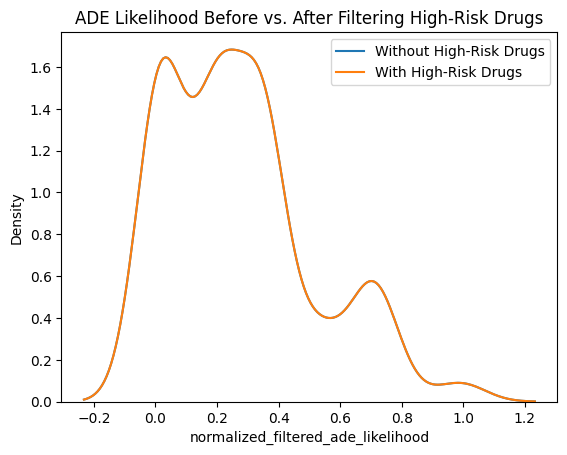

In [64]:
# Sensitivity Of High-Risk Drugs
# Examine how removing high-risk drugs (e.g., Dupixent) impacted derived features.

if 'normalized_filtered_ade_likelihood' in enriched_nhanes.columns:
    sns.kdeplot(enriched_nhanes['normalized_filtered_ade_likelihood'], label="Without High-Risk Drugs")
else:
    sns.kdeplot(enriched_nhanes['filtered_ade_likelihood'], label="Without High-Risk Drugs")
    
if 'normalized_filtered_ade_likelihood' not in enriched_nhanes.columns and 'ade_likelihood' in enriched_nhanes.columns:
    sns.kdeplot(enriched_nhanes['ade_likelihood'], label="With High-Risk Drugs")
elif 'normalized_filtered_ade_likelihood' in enriched_nhanes.columns:
    sns.kdeplot(enriched_nhanes['normalized_filtered_ade_likelihood'], label="With High-Risk Drugs")

plt.title("ADE Likelihood Before vs. After Filtering High-Risk Drugs")
plt.legend()
plt.show()


In [65]:
#Group Level Insights
#Explore aggregated metrics by groups
group_metrics = enriched_nhanes.groupby(['age_group', 'polypharmacy_risk'])[
    ['rebalanced_composite_risk_score', 'normalized_filtered_ade_likelihood']
].mean()
print("Group Level Metrics:")
print(group_metrics)


Group Level Metrics:
                               rebalanced_composite_risk_score  \
age_group   polypharmacy_risk                                    
Child       Low                                       0.185714   
            Moderate                                  0.635589   
Elderly     High                                      0.839410   
            Low                                       0.506079   
            Moderate                                  0.696240   
Middle Aged Low                                       0.505898   
            Moderate                                  0.679440   
Young Adult Low                                       0.490889   
            Moderate                                  0.803711   

                               normalized_filtered_ade_likelihood  
age_group   polypharmacy_risk                                      
Child       Low                                          0.000000  
            Moderate                            

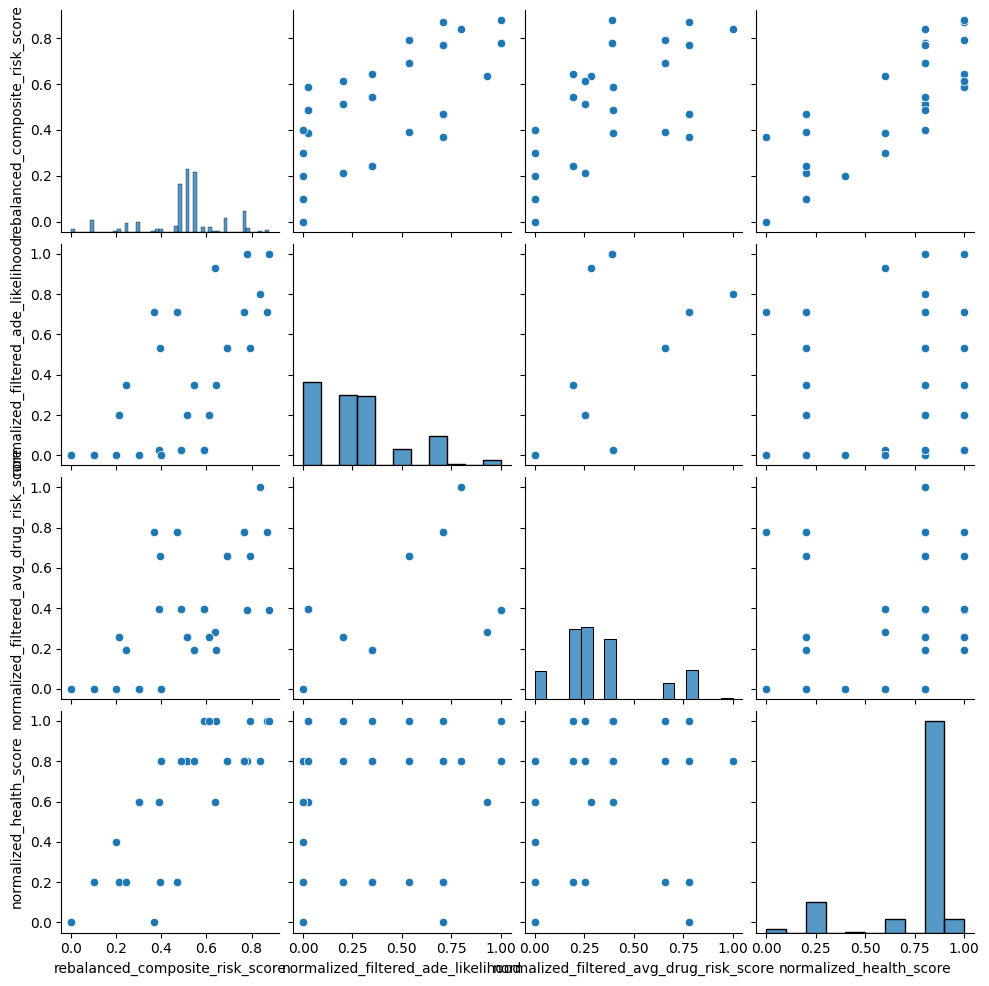

In [66]:
#Visualize Relationships 
#Relation between key features and target variable
sns.pairplot(
    enriched_nhanes,
    vars=[
        'rebalanced_composite_risk_score',
        'normalized_filtered_ade_likelihood',
        'normalized_filtered_avg_drug_risk_score',
        'normalized_health_score',
    ],
)
plt.show()
